In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
#import sys
#sys.path.append('C:/Users/anton/git_repository/Exercise03')
import task4_functions as f

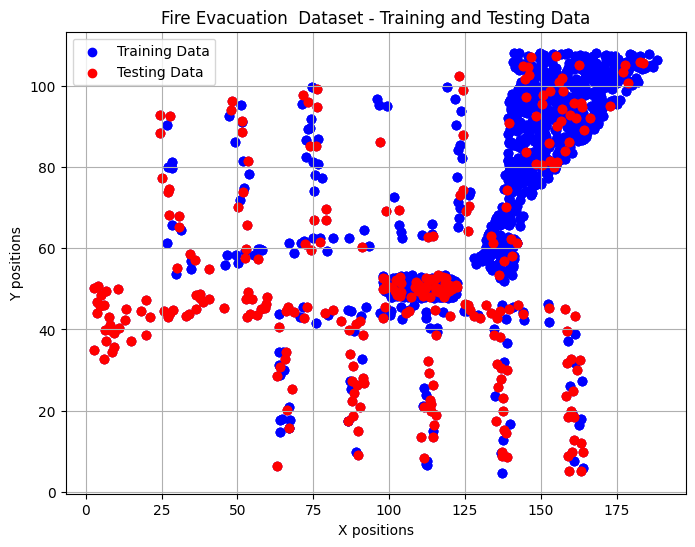

In [38]:
# Load the training and testing datasets
train_data = np.load("FireEvac_train_set.npy")
test_data = np.load("FireEvac_test_set.npy")

#print("train data shape : ", train_data.shape)
#print("test data shape : ", test_data.shape)

# Extract x and y positions from the datasets
x_train, y_train = train_data[:, 0], train_data[:, 1]
x_test, y_test = test_data[:, 0], test_data[:, 1]

        #Visualization (Q1)
# Create a scatter plot for the training dataset
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, c='blue', label='Training Data')

# Add the testing dataset to the plot
plt.scatter(x_test, y_test, c='red', label='Testing Data')

# Set plot labels and title
plt.xlabel('X positions')
plt.ylabel('Y positions')
plt.title('Fire Evacuation  Dataset - Training and Testing Data')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

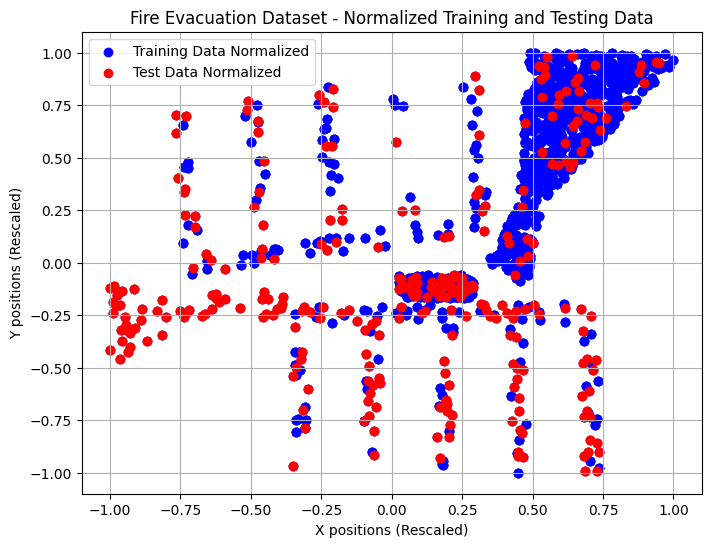

In [39]:
# Rescale the x and y values of the training dataset to [-1, 1]
train_min = np.min(train_data, axis=0)
train_max = np.max(train_data, axis=0)

train_data_scaled = -1 + (2 * (train_data - train_min) / (train_max - train_min))
test_data_scaled = -1 + (2 * (test_data_combined - train_min) / (train_max - train_min))

# Create a scatter plot for the training dataset
plt.figure(figsize=(8, 6))
plt.scatter(train_data_scaled[:, 0], train_data_scaled[:, 1], c='blue', label='Training Data Normalized')
plt.scatter(test_data_scaled[:, 0], test_data_scaled[:, 1], c='red', label='Test Data Normalized')

# Set plot labels and title
plt.xlabel('X positions (Rescaled)')
plt.ylabel('Y positions (Rescaled)')
plt.title('Fire Evacuation Dataset - Normalized Training and Testing Data')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [40]:
data_shape = 2
latent_dim = 2
model, encoder, decoder = f.VAE(data_shape, latent_dim)

The following Variables were used a Lambda layer's call (lambda_9), but
are not present in its tracked objects:
  <tf.Variable 'decoder_stddev:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [41]:
# Train the VAE and collect loss values at specific epochs
batch_size = 64

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True) # Stop training when the validation loss is no longer improving ie convergence is reached

history = model.fit(
    train_data_scaled,
    epochs=100,
    batch_size=batch_size,
    validation_data=(test_data_scaled, None),
    verbose=1,
    callbacks=[early_stopping]
)
if early_stopping.stopped_epoch != 0:
    print("Convergence reached at epoch", early_stopping.stopped_epoch + 1)
else:
    print("Training ran for ", len(history.history['loss']) ," epochs without early stopping")

Epoch 1/100
47/47 [==============================] - 1s 6ms/step - loss: 8.8320 - val_loss: 10.0078
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 5.1690 - val_loss: 8.3208
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 4.6902 - val_loss: 6.5575
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 4.1617 - val_loss: 5.1460
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 3.8414 - val_loss: 4.7270
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 3.7350 - val_loss: 4.5601
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 3.7076 - val_loss: 4.5685
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 3.6460 - val_loss: 4.6718
Epoch 9/100
47/47 [==============================] - 0s 3ms/step - loss: 3.5826 - val_loss: 4.3820
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 3.6287 - val_loss: 4.5366
Epoch 11

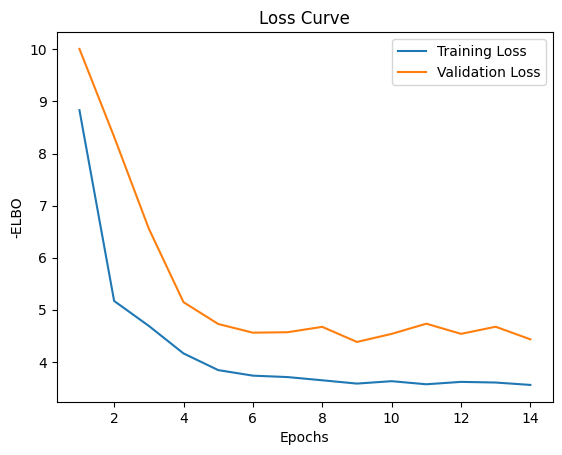

In [42]:

    #Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

    #Plot loss curve
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('-ELBO')
plt.title('Loss Curve')
plt.legend()
plt.show()
